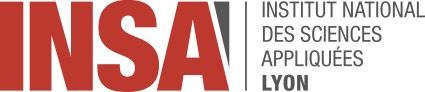
# P2I7: Chapitre 2 méthodes numériques
## Principe d'approximation d'une EDO par un schéma numérique
Camille Carvalho (INSA/ICJ)

In [2]:
#libraries à importer
%matplotlib inline #permet l'affichage des figures dans le corps du notebook
from matplotlib import pyplot as plt #librairie d'affichage
import numpy as np #librairie pour le calcul numérique
import sympy as sp #libraire pour la calcul symbolique

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (linéarisé autour de l'état d'équilibre) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\theta(t), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


On souhaite approcher numériquement la solution de ce problème de Cauchy. Pour cela on va se fixer un $\Delta t > 0$ un pas de temps donné, $T > 0$ un temps de simulation avec $T = N\Delta t$, pour $N$ un entier, et on va poser
$$ t_i = i\Delta t ~~~\mbox{ pour } 0 \le i \le N. $$
On teste ici 3 schémas:
- Euler explicite
- Euler implicite
- Verlet

# Section 2.1 Schéma d'Euler explicite
**Question 1.** Remettez le problème de Cauchy ci-dessus sous la forme d'un système d'ordre 1 et écrivez le schéma d'Euler explicite dessus. Déduisez-en la règle qui fait passer de $\theta_i, \dot{\theta}_i$ à $\theta_{i+1}, \dot{\theta}_{i+1}$.

**Question 2.** Programmer les itérations de ce schéma en Python et visualiser les solutions pour $\ell = 1$, $g = 10$, $\alpha=1$ et $T=10$.

**Question 3.** L'énergie totale du système au pas de temps $i$ s'écrit
    $$ \frac{1}{2}  (\dot{\theta}_i)^2 + \frac{g}{2\ell}\theta_i^2. $$
    Le pendule étant non-amorti, cette énergie doit se conserver au cours
    du temps. Dessinez l'évolution de l'énergie totale au cours du temps.
    Que remarquez-vous ?

Remarquez que l'on peut éliminer la vitesse $\dot{\theta}_i$ (en soustrayant à la première ligne du schéma la m\^eme première ligne écrite au pas $i-1$). On obtient alors
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i-1}. $$
Cela peut être intéressant, mais il s'agit d'un schéma à **deux pas** ($\theta_{i+1}$ est donné en fonction de $\theta_i$ et $\theta_{i-1}$). En pratique, il faudra d'abord calculer $\theta_1$ avec le schéma à un pas avant de pouvoir l'utiliser.

# Section 2.2 Schéma d'Euler implicite 
On considère maintenant le schéma
$$ Y_{i+1} = Y_{i} + {\Delta t}F(t_{i+1}, Y_{i+1}). $$

**Question 1.** En réutilisant le problème ci-dessus sous la forme d'un système d'ordre 1, écrivez le schéma d'Euler implicite associé. Déterminer ce qui est à résoudre à chaque pas de temps.

**Question 2.** Adaptez votre programme Python au schéma d'Euler implicite. Pour cela, trouvez l'équation que doit résoudre $\theta_{i+1}$. Pour notre problème, cette équation est linéaire et peut donc être résolue à la main. Ce ne sera pas le cas avec des problèmes non-linéaires. Visualisez la solution.

**Question 3.** Dessinez également l'évolution de l'énergie totale au cours du temps.
  Que remarquez-vous comme différence avec le schéma d'Euler explicite ?

  
Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à **deux pas**
  $$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i+1}. $$

# Section 2.3 Schéma de Verlet
**Question 1.** Adaptez votre programme Matlab au schéma de Verlet et visualiser la solutions ainsi que l'évolution de l'énergie totale. Que remarquez-vous ?

Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à {\bf deux pas}
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i}. $$
  Il s'agit donc d'un schéma explicite qui est en un certain sens intermédiaire entre le schéma d'Euler explicite de celui d'Euler implicite.